In [8]:
import cairo
import cv2
from math import pi
import random
import math
from PIL import Image
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt 

In [29]:
def polar_to_cart(theta, dist):
    
    x = 1 + dist * math.cos(theta)
    y = 1 + dist * math.sin(theta)
    
    return x,y

t = math.pi/180.0

def remap(old_val, old_min, old_max, new_min, new_max):
    return (new_max - new_min)*(old_val - old_min) / (old_max - old_min) + new_min

def draw(geno):
    
    
    surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, 100, 100)
    ctx = cairo.Context(surface)
    ctx.set_antialias(cairo.ANTIALIAS_NONE)

    ctx.scale(50, 50)
    # Paint the background
    ctx.set_source_rgb(0, 0 , 0)
    ctx.paint()

    r1 = remap(geno[8], 0, 1,0.1, 1)
    r2 = remap(geno[9], 0, 1,0.1, 1)
    r3 = remap(geno[10], 0, 1,0.1, 1)
    r4 = remap(geno[11], 0, 1,0.1, 1)
    r5 = remap(geno[12], 0, 1,0.1, 1)
    r6 = remap(geno[13], 0, 1,0.1, 1)
    r7 = remap(geno[14], 0, 1,0.1, 1)
    r8 = remap(geno[15], 0, 1,0.1, 1)

    # Draw the image
    firstx, firsty = polar_to_cart((0 + geno[0])*45*t, r1)
    secondx, secondy = polar_to_cart((1 + geno[1])*45*t, r2)
    thirdx, thirdy = polar_to_cart((2 + geno[2])*45*t, r3)
    forthx, forthy = polar_to_cart((3 + geno[3])*45*t, r4)
    fifthx, fifthy = polar_to_cart((4 + geno[4])*45*t, r5)
    sixthx, sixthy = polar_to_cart((5 + geno[5])*45*t, r6)
    seventhx, seventhy = polar_to_cart((6 + geno[6])*45*t, r7)
    eigthx, eigthy = polar_to_cart((7 + geno[7])*45*t, r8)
    ctx.move_to(firstx, firsty)

    ctx.line_to(secondx, secondy)
    ctx.line_to(thirdx, thirdy)
    ctx.line_to(forthx, forthy)
    ctx.line_to(fifthx, fifthy)
    ctx.line_to(sixthx, sixthy)
    ctx.line_to(seventhx, seventhy)
    ctx.line_to(eigthx, eigthy)
    
    ctx.close_path()
    ctx.set_source_rgb(1, 1, 1)
    ctx.fill_preserve()
    

    return surface

avg3 max : 0.4695
avg7 max : 0.5392
myversion3 max : 0.4292
myversion7 max : 0.4097
Standard max : 0.5771
avg3 mean : 0.1573581173153732
avg7 mean : 0.19239313343799055
myversion3 mean : 0.13699672955974843
myversion7 mean : 0.11110791023197022
Standard mean : 0.1844317060998821


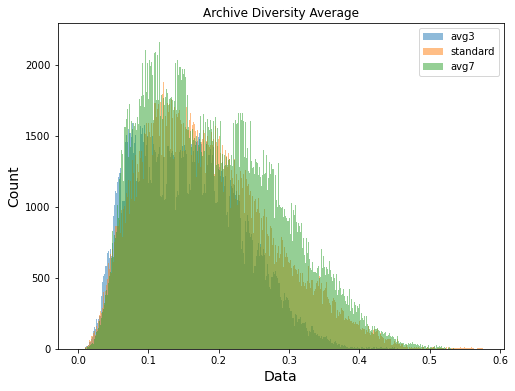

In [6]:
def load_data(filename, dim,dim_x):
    print("Loading ",filename)
    data = np.loadtxt(filename)
    fit = data[:, 0:1]
    cent = data[:,1: dim+1]
    desc = data[:,dim+1: 2*dim+1]
    x = data[:,2*dim+1:2*dim+1+dim_x]
    
def load_centroids(filename):
    points = np.loadtxt(filename)
    return points


diversity_avg3 = []

centroids_avg3 = load_centroids("centroids_avg3.dat")
data_avg3 = np.loadtxt("archive_avg3.dat")
fit_avg3 = data_avg3[:,0:1]
cent_avg3 = data_avg3[:, 1:3]
desc_avg3 = data_avg3[:, 3: 5]
geno_avg3 = data_avg3[:, 5: 21]
#print("Fit: {}".format(fit[1]))
#print("Cent: {}".format(cent[1]))
#print("Behavior: {}".format(desc[1]))
#print("Geno: {}".format(geno[1]))

for j in range(0, fit_avg3.shape[0]):    
    img1 = draw(geno_avg3[j])
    imgP1 = Image.frombuffer("RGBA",( img1.get_width(),img1.get_height() ),img1.get_data(),"raw","RGBA",0,1)
    img_arr1 = np.array(imgP1)
    flat1 = img_arr1[:,:,0].flatten()
    
    
    for k in range(0, fit_avg3.shape[0]):
        img2 = draw(geno_avg3[k])
        imgP2 = Image.frombuffer("RGBA",( img2.get_width(),img2.get_height() ),img2.get_data(),"raw","RGBA",0,1)
        img_arr2 = np.array(imgP2)
        flat2 = img_arr2[:,:,0].flatten()
        dist = distance.hamming(flat1,flat2)
        diversity_avg3.append(dist)

diversity_avg7 = []

centroids_avg7 = load_centroids("centroids_avg7.dat")
data_avg7 = np.loadtxt("archive_avg7.dat")
fit_avg7 = data_avg7[:,0:1]
cent_avg7 = data_avg7[:, 1:3]
desc_avg7 = data_avg7[:, 3: 5]
geno_avg7 = data_avg7[:, 5: 21]
#print("Fit: {}".format(fit[1]))
#print("Cent: {}".format(cent[1]))
#print("Behavior: {}".format(desc[1]))
#print("Geno: {}".format(geno[1]))

for j in range(0, fit_avg7.shape[0]):    
    img1 = draw(geno_avg7[j])
    imgP1 = Image.frombuffer("RGBA",( img1.get_width(),img1.get_height() ),img1.get_data(),"raw","RGBA",0,1)
    img_arr1 = np.array(imgP1)
    flat1 = img_arr1[:,:,0].flatten()
    
    
    for k in range(0, fit_avg7.shape[0]):
        img2 = draw(geno_avg7[k])
        imgP2 = Image.frombuffer("RGBA",( img2.get_width(),img2.get_height() ),img2.get_data(),"raw","RGBA",0,1)
        img_arr2 = np.array(imgP2)
        flat2 = img_arr2[:,:,0].flatten()
        dist = distance.hamming(flat1,flat2)
        diversity_avg7.append(dist)
        
diversity_standard = []

centroids_standard = load_centroids("centroids_standard.dat")
data_standard = np.loadtxt("archive_standard.dat")
fit_standard = data_standard[:,0:1]
cent_standard = data_standard[:, 1:3]
desc_standard = data_standard[:, 3: 5]
geno_standard = data_standard[:, 5: 21]
#print("Fit: {}".format(fit[1]))
#print("Cent: {}".format(cent[1]))
#print("Behavior: {}".format(desc[1]))
#print("Geno: {}".format(geno[1]))

for j in range(0, fit_standard.shape[0]):    
    img1 = draw(geno_standard[j])
    imgP1 = Image.frombuffer("RGBA",( img1.get_width(),img1.get_height() ),img1.get_data(),"raw","RGBA",0,1)
    img_arr1 = np.array(imgP1)
    flat1 = img_arr1[:,:,0].flatten()
    
    
    for k in range(0, fit_standard.shape[0]):
        img2 = draw(geno_standard[k])
        imgP2 = Image.frombuffer("RGBA",( img2.get_width(),img2.get_height() ),img2.get_data(),"raw","RGBA",0,1)
        img_arr2 = np.array(imgP2)
        flat2 = img_arr2[:,:,0].flatten()
        dist = distance.hamming(flat1,flat2)
        diversity_standard.append(dist)
        
diversity_myversion7 = []

centroids_myversion7 = load_centroids("centroids_myversion7.dat")
data_myversion7 = np.loadtxt("archive_myversion7.dat")
fit_myversion7 = data_myversion7[:,0:1]
cent_myversion7 = data_myversion7[:, 1:3]
desc_myversion7 = data_myversion7[:, 3: 5]
geno_myversion7 = data_myversion7[:, 5: 21]
#print("Fit: {}".format(fit[1]))
#print("Cent: {}".format(cent[1]))
#print("Behavior: {}".format(desc[1]))
#print("Geno: {}".format(geno[1]))

for j in range(0, fit_myversion7.shape[0]):    
    img1 = draw(geno_myversion7[j])
    imgP1 = Image.frombuffer("RGBA",( img1.get_width(),img1.get_height() ),img1.get_data(),"raw","RGBA",0,1)
    img_arr1 = np.array(imgP1)
    flat1 = img_arr1[:,:,0].flatten()
    
    
    for k in range(0, fit_myversion7.shape[0]):
        img2 = draw(geno_myversion7[k])
        imgP2 = Image.frombuffer("RGBA",( img2.get_width(),img2.get_height() ),img2.get_data(),"raw","RGBA",0,1)
        img_arr2 = np.array(imgP2)
        flat2 = img_arr2[:,:,0].flatten()
        dist = distance.hamming(flat1,flat2)
        diversity_myversion7.append(dist)

diversity_myversion3 = []

centroids_myversion3 = load_centroids("centroids_myversion3.dat")
data_myversion3 = np.loadtxt("archive_myversion3.dat")
fit_myversion3 = data_myversion3[:,0:1]
cent_myversion3 = data_myversion3[:, 1:3]
desc_myversion3 = data_myversion3[:, 3: 5]
geno_myversion3 = data_myversion3[:, 5: 21]
#print("Fit: {}".format(fit[1]))
#print("Cent: {}".format(cent[1]))
#print("Behavior: {}".format(desc[1]))
#print("Geno: {}".format(geno[1]))

for j in range(0, fit_myversion3.shape[0]):    
    img1 = draw(geno_myversion3[j])
    imgP1 = Image.frombuffer("RGBA",( img1.get_width(),img1.get_height() ),img1.get_data(),"raw","RGBA",0,1)
    img_arr1 = np.array(imgP1)
    flat1 = img_arr1[:,:,0].flatten()
    
    
    for k in range(0, fit_myversion3.shape[0]):
        img2 = draw(geno_myversion3[k])
        imgP2 = Image.frombuffer("RGBA",( img2.get_width(),img2.get_height() ),img2.get_data(),"raw","RGBA",0,1)
        img_arr2 = np.array(imgP2)
        flat2 = img_arr2[:,:,0].flatten()
        dist = distance.hamming(flat1,flat2)
        diversity_myversion3.append(dist)

    
#Histogram

plt.figure(figsize=(8,6))
plt.hist(diversity_avg3, bins=1000, alpha=0.5, label="avg3")
plt.hist(diversity_standard, bins=1000, alpha=0.5, label="standard")
plt.hist(diversity_avg7, bins=1000, alpha=0.5, label="avg7")
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("Archive Diversity Average")
plt.legend(loc='upper right')
plt.savefig("Archive Diversity Average.png")

mean_avg3 = np.mean(diversity_avg3)
mean_avg7 = np.mean(diversity_avg7)
mean_myversion3 = np.mean(diversity_myversion3)
mean_myversion7 = np.mean(diversity_myversion7)
mean_standard = np.mean(diversity_standard)

print("avg3 max : {}".format(max(diversity_avg3)))
print("avg7 max : {}".format(max(diversity_avg7)))
print("myversion3 max : {}".format(max(diversity_myversion3)))
print("myversion7 max : {}".format(max(diversity_myversion7)))
print("Standard max : {}".format(max(diversity_standard)))

print("avg3 mean : {}".format(mean_avg3))
print("avg7 mean : {}".format(mean_avg7))
print("myversion3 mean : {}".format(mean_myversion3))
print("myversion7 mean : {}".format(mean_myversion7))
print("Standard mean : {}".format(mean_standard))

Euclidean avg3 max : 0.6635510530471638
Euclidean avg7 max : 0.7182617907142215
Euclidean myversion3 max : 0.6396092557178953
Euclidean myversion7 max : 0.6253798845501828
Euclidean Standard max : 0.746659226153404
Euclidean avg3 mean : 0.3556306581381354
Euclidean avg7 mean : 0.3959435502758125
Euclidean myversion3 mean : 0.326363463537458
Euclidean myversion7 mean : 0.28976077273838685
Euclidean Standard mean : 0.38898238741954727


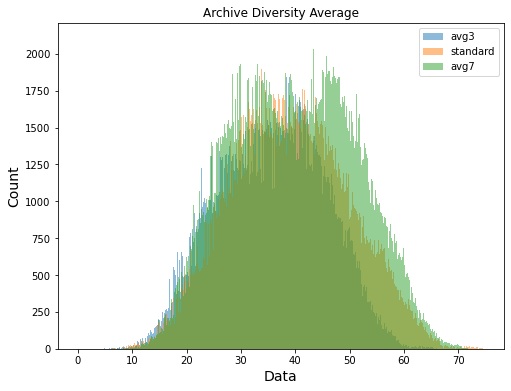

In [31]:
def load_data(filename, dim,dim_x):
    print("Loading ",filename)
    data = np.loadtxt(filename)
    fit = data[:, 0:1]
    cent = data[:,1: dim+1]
    desc = data[:,dim+1: 2*dim+1]
    x = data[:,2*dim+1:2*dim+1+dim_x]
    
def load_centroids(filename):
    points = np.loadtxt(filename)
    return points

test1 = np.full((10000,), 1)
test2 = np.full((10000,), 0)
max_posDist = np.linalg.norm(test1 - test2)

diversity_avg3 = []

centroids_avg3 = load_centroids("centroids_avg3.dat")
data_avg3 = np.loadtxt("archive_avg3.dat")
fit_avg3 = data_avg3[:,0:1]
cent_avg3 = data_avg3[:, 1:3]
desc_avg3 = data_avg3[:, 3: 5]
geno_avg3 = data_avg3[:, 5: 21]
#print("Fit: {}".format(fit[1]))
#print("Cent: {}".format(cent[1]))
#print("Behavior: {}".format(desc[1]))
#print("Geno: {}".format(geno[1]))

for j in range(0, fit_avg3.shape[0]):    
    img1 = draw(geno_avg3[j])
    imgP1 = Image.frombuffer("RGBA",( img1.get_width(),img1.get_height() ),img1.get_data(),"raw","RGBA",0,1)
    img_arr1 = np.array(imgP1)
    flat1 = img_arr1[:,:,0].flatten()
    flat1 = flat1/255
    
    for k in range(0, fit_avg3.shape[0]):
        img2 = draw(geno_avg3[k])
        imgP2 = Image.frombuffer("RGBA",( img2.get_width(),img2.get_height() ),img2.get_data(),"raw","RGBA",0,1)
        img_arr2 = np.array(imgP2)
        flat2 = img_arr2[:,:,0].flatten()
        flat2 = flat2/255
        dist = np.linalg.norm(flat1 - flat2)
        diversity_avg3.append(dist)

diversity_avg7 = []

centroids_avg7 = load_centroids("centroids_avg7.dat")
data_avg7 = np.loadtxt("archive_avg7.dat")
fit_avg7 = data_avg7[:,0:1]
cent_avg7 = data_avg7[:, 1:3]
desc_avg7 = data_avg7[:, 3: 5]
geno_avg7 = data_avg7[:, 5: 21]
#print("Fit: {}".format(fit[1]))
#print("Cent: {}".format(cent[1]))
#print("Behavior: {}".format(desc[1]))
#print("Geno: {}".format(geno[1]))

for j in range(0, fit_avg7.shape[0]):    
    img1 = draw(geno_avg7[j])
    imgP1 = Image.frombuffer("RGBA",( img1.get_width(),img1.get_height() ),img1.get_data(),"raw","RGBA",0,1)
    img_arr1 = np.array(imgP1)
    flat1 = img_arr1[:,:,0].flatten()
    flat1 = flat1/255
    
    for k in range(0, fit_avg7.shape[0]):
        img2 = draw(geno_avg7[k])
        imgP2 = Image.frombuffer("RGBA",( img2.get_width(),img2.get_height() ),img2.get_data(),"raw","RGBA",0,1)
        img_arr2 = np.array(imgP2)
        flat2 = img_arr2[:,:,0].flatten()
        flat2 = flat2/255
        dist = np.linalg.norm(flat1 - flat2)
        diversity_avg7.append(dist)
        
diversity_standard = []

centroids_standard = load_centroids("centroids_standard.dat")
data_standard = np.loadtxt("archive_standard.dat")
fit_standard = data_standard[:,0:1]
cent_standard = data_standard[:, 1:3]
desc_standard = data_standard[:, 3: 5]
geno_standard = data_standard[:, 5: 21]
#print("Fit: {}".format(fit[1]))
#print("Cent: {}".format(cent[1]))
#print("Behavior: {}".format(desc[1]))
#print("Geno: {}".format(geno[1]))

for j in range(0, fit_standard.shape[0]):    
    img1 = draw(geno_standard[j])
    imgP1 = Image.frombuffer("RGBA",( img1.get_width(),img1.get_height() ),img1.get_data(),"raw","RGBA",0,1)
    img_arr1 = np.array(imgP1)
    flat1 = img_arr1[:,:,0].flatten()
    flat1 = flat1/255
    
    
    for k in range(0, fit_standard.shape[0]):
        img2 = draw(geno_standard[k])
        imgP2 = Image.frombuffer("RGBA",( img2.get_width(),img2.get_height() ),img2.get_data(),"raw","RGBA",0,1)
        img_arr2 = np.array(imgP2)
        flat2 = img_arr2[:,:,0].flatten()
        flat2 = flat2/255
        dist = np.linalg.norm(flat1 - flat2)
        diversity_standard.append(dist)
        
diversity_myversion7 = []

centroids_myversion7 = load_centroids("centroids_myversion7.dat")
data_myversion7 = np.loadtxt("archive_myversion7.dat")
fit_myversion7 = data_myversion7[:,0:1]
cent_myversion7 = data_myversion7[:, 1:3]
desc_myversion7 = data_myversion7[:, 3: 5]
geno_myversion7 = data_myversion7[:, 5: 21]
#print("Fit: {}".format(fit[1]))
#print("Cent: {}".format(cent[1]))
#print("Behavior: {}".format(desc[1]))
#print("Geno: {}".format(geno[1]))

for j in range(0, fit_myversion7.shape[0]):    
    img1 = draw(geno_myversion7[j])
    imgP1 = Image.frombuffer("RGBA",( img1.get_width(),img1.get_height() ),img1.get_data(),"raw","RGBA",0,1)
    img_arr1 = np.array(imgP1)
    flat1 = img_arr1[:,:,0].flatten()
    flat1 = flat1/255
    
    
    for k in range(0, fit_myversion7.shape[0]):
        img2 = draw(geno_myversion7[k])
        imgP2 = Image.frombuffer("RGBA",( img2.get_width(),img2.get_height() ),img2.get_data(),"raw","RGBA",0,1)
        img_arr2 = np.array(imgP2)
        flat2 = img_arr2[:,:,0].flatten()
        flat2 = flat2/255
        dist = np.linalg.norm(flat1 - flat2)
        diversity_myversion7.append(dist)

diversity_myversion3 = []

centroids_myversion3 = load_centroids("centroids_myversion3.dat")
data_myversion3 = np.loadtxt("archive_myversion3.dat")
fit_myversion3 = data_myversion3[:,0:1]
cent_myversion3 = data_myversion3[:, 1:3]
desc_myversion3 = data_myversion3[:, 3: 5]
geno_myversion3 = data_myversion3[:, 5: 21]
#print("Fit: {}".format(fit[1]))
#print("Cent: {}".format(cent[1]))
#print("Behavior: {}".format(desc[1]))
#print("Geno: {}".format(geno[1]))

for j in range(0, fit_myversion3.shape[0]):    
    img1 = draw(geno_myversion3[j])
    imgP1 = Image.frombuffer("RGBA",( img1.get_width(),img1.get_height() ),img1.get_data(),"raw","RGBA",0,1)
    img_arr1 = np.array(imgP1)
    flat1 = img_arr1[:,:,0].flatten()
    flat1 = flat1/255
    
    
    for k in range(0, fit_myversion3.shape[0]):
        img2 = draw(geno_myversion3[k])
        imgP2 = Image.frombuffer("RGBA",( img2.get_width(),img2.get_height() ),img2.get_data(),"raw","RGBA",0,1)
        img_arr2 = np.array(imgP2)
        flat2 = img_arr2[:,:,0].flatten()
        flat2 = flat2/255
        dist = np.linalg.norm(flat1 - flat2)
        diversity_myversion3.append(dist)

    
#Histogram

plt.figure(figsize=(8,6))
plt.hist(diversity_avg3, bins=1000, alpha=0.5, label="avg3")
plt.hist(diversity_standard, bins=1000, alpha=0.5, label="standard")
plt.hist(diversity_avg7, bins=1000, alpha=0.5, label="avg7")
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("Archive Diversity Average")
plt.legend(loc='upper right')
plt.savefig("Archive Diversity Average.png")

mean_avg3 = np.mean(diversity_avg3) / max_posDist
mean_avg7 = np.mean(diversity_avg7) / max_posDist
mean_myversion3 = np.mean(diversity_myversion3) / max_posDist
mean_myversion7 = np.mean(diversity_myversion7) / max_posDist
mean_standard = np.mean(diversity_standard) / max_posDist

print("Euclidean avg3 max : {}".format(max(diversity_avg3) / max_posDist))
print("Euclidean avg7 max : {}".format(max(diversity_avg7) / max_posDist))
print("Euclidean myversion3 max : {}".format(max(diversity_myversion3) / max_posDist))
print("Euclidean myversion7 max : {}".format(max(diversity_myversion7) / max_posDist))
print("Euclidean Standard max : {}".format(max(diversity_standard) / max_posDist))

print("Euclidean avg3 mean : {}".format(mean_avg3))
print("Euclidean avg7 mean : {}".format(mean_avg7))
print("Euclidean myversion3 mean : {}".format(mean_myversion3))
print("Euclidean myversion7 mean : {}".format(mean_myversion7))
print("Euclidean Standard mean : {}".format(mean_standard))